# ---SENTIMENT ANALYSIS ON AMAZON ALEXA REVIEWS---

STEPS:
    1.Importing the libraries
    
    2.Loading the data set
    
    3.Checking for NUll values
    
    4.Exploratory data analysis
    
    5.Droping unwanted columns
    
    6.WordCloud
    
    7.Preprocessing
    
         A) Convert text to lower case
         
         B) Tokenization and Removing the Punctuations
         
         C) Lemmatization
         
         D) Removing Stop words
         
         E) Vectorization-using TF-IDF vectorizer
         
    8.Spliting Independent column and Target column
    
    9.Spliting the data into Training and Testing
    
    10.Training the models:
    
         A) Logisitic Regression Model
         
         B) KNearest Neighbors Model
         
         C) Multinomial naive_bayes Model
         
    11.Confusion matrix on each models
    
    12.Classification Report on Each models
    
    13.Saving the model

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [3]:
import warnings
warnings.filterwarnings("ignore")

# LOADING THE DATASET

In [4]:
df=pd.read_csv(r'C:\Users\91882\Downloads\amazon_alexa_data.csv')

# Displaying first 5 rows

In [5]:
df.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1


# Droping Unnamed column

In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# Statistics of data

# 1.Statistics for Numerical column

In [8]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# 2.Statistics for object column

In [9]:
df.describe(include='object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


# Getting information about data 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


# Shape of Dataframe

In [11]:
df.shape

(3150, 5)

# Checking for NULL values

In [12]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

Note:  NO NULL values

# EXPOLATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

# 1.Ratings

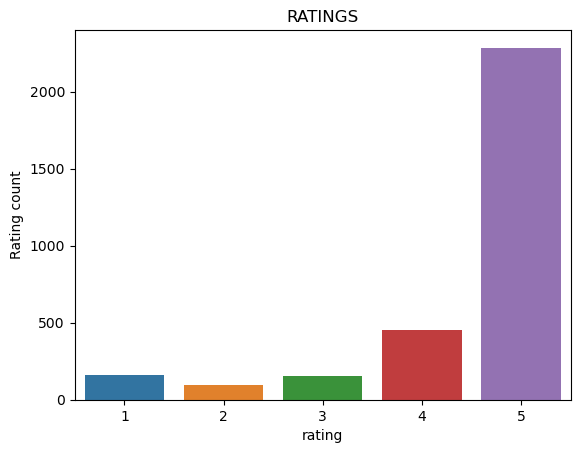

In [13]:
plt.title("RATINGS")
sns.countplot(x=df['rating'])
plt.ylabel("Rating count")
plt.show()

INFERENCE: 1.Rating 5  was given by most of the customers
    
           2.Ratings from  1 to 4 has very low count
        
           3.We can conclude that most of the Amazon products are satisfied for the customers

# 2.Variation of Products

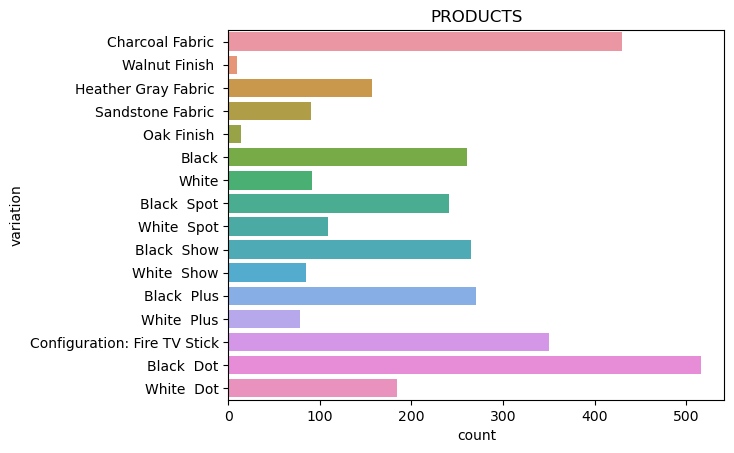

In [14]:
plt.title("PRODUCTS")
sns.countplot(y=df['variation'])
plt.xlabel("count")
plt.show()

# 3.Feedback count

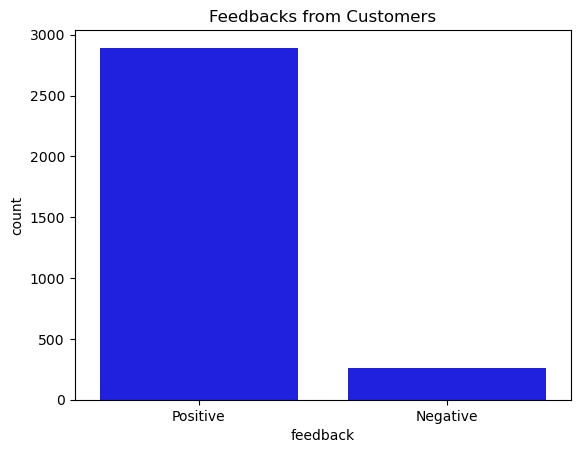

In [15]:
plt.title("Feedbacks from Customers")
plt.ylabel("Feedback count")
plt.xlabel("Sentiment")
sns.countplot(x=df['feedback'].replace({0:"Negative",1:"Positive"}),color='blue')
plt.show()

# INFERENCE: 95% of Customers gave Positive feedbacks

# BIVARIATE ANALYSIS

# 1.Rating Vs Variation

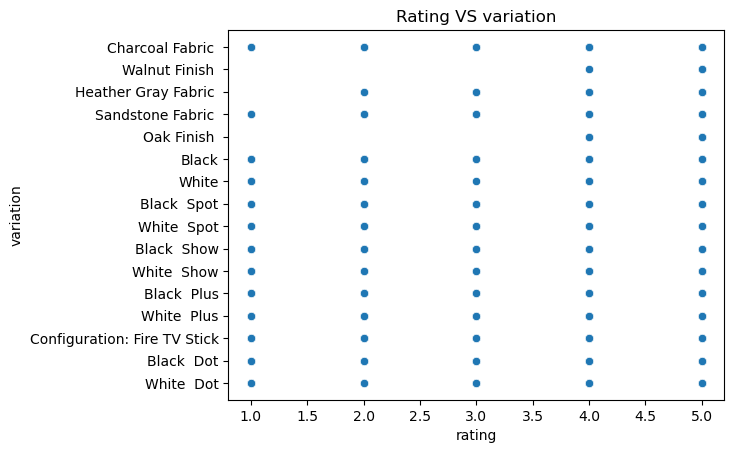

In [16]:
plt.title("Rating VS variation")
sns.scatterplot(x=df['rating'],y=df['variation'])
plt.show()

INFERENCE: 
          1.Almost rating on each variation of product were same

# DROPING THE UNWANTED COLUMN FOR SENTIMENT ANALYSIS

In [17]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [18]:
df=df.drop(['rating','date','variation'],axis=1)

In [19]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


# PREPROCESSING OF AMAZON ALEXA REVIEWS

In [20]:
nlp=spacy.load('en_core_web_sm')

In [21]:
from spacy.lang.en.stop_words import STOP_WORDS

In [22]:
stopwords=STOP_WORDS

In [23]:
print(len(stopwords))

326


# 1.Converting to Lower case

In [24]:
def low(text):
    text=text.lower()
    return text

In [25]:
df['verified_reviews']=df['verified_reviews'].apply(low)

In [26]:
df['verified_reviews'].head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: verified_reviews, dtype: object

Converted to Lower cases

# 2.Tokenization and Removing Punctuations

In [27]:
def remove_pun(text):
    doc=nlp(text)
    rem=[pun for pun in doc if not pun.is_punct]
    return " ".join(token.text for token in rem)

In [28]:
df['verified_reviews']=df['verified_reviews'].apply(remove_pun)

In [29]:
df.head()

,verified_reviews,feedback
0,love my echo,1
1,loved it,1
2,sometimes while playing a game you can answer ...,1
3,i have had a lot of fun with this thing my 4 y...,1
4,music,1


Note: Punctuations are removed

# 3.Lemmatization and Removing Stopwords

In [30]:
def remove_stop(text):
    doc=nlp(text)
    lem=[w.lemma_ for w in doc]
    st=[stop for stop in lem if stop not in stopwords]
    return " ".join(l for l in st)

In [31]:
df['verified_reviews']=df['verified_reviews'].apply(remove_stop)

In [32]:
df.head()

,verified_reviews,feedback
0,love echo,1
1,love,1
2,play game answer question correctly alexa wron...,1
3,I lot fun thing 4 yr old learn dinosaur I cont...,1
4,music,1


# WORDCLOUD

# 1.Wordcloud for positive reviews

In [33]:
df_pos=df[df['feedback']==1]

In [34]:
df_pos.head()

,verified_reviews,feedback
0,love echo,1
1,love,1
2,play game answer question correctly alexa wron...,1
3,I lot fun thing 4 yr old learn dinosaur I cont...,1
4,music,1


(-0.5, 1599.5, 899.5, -0.5)

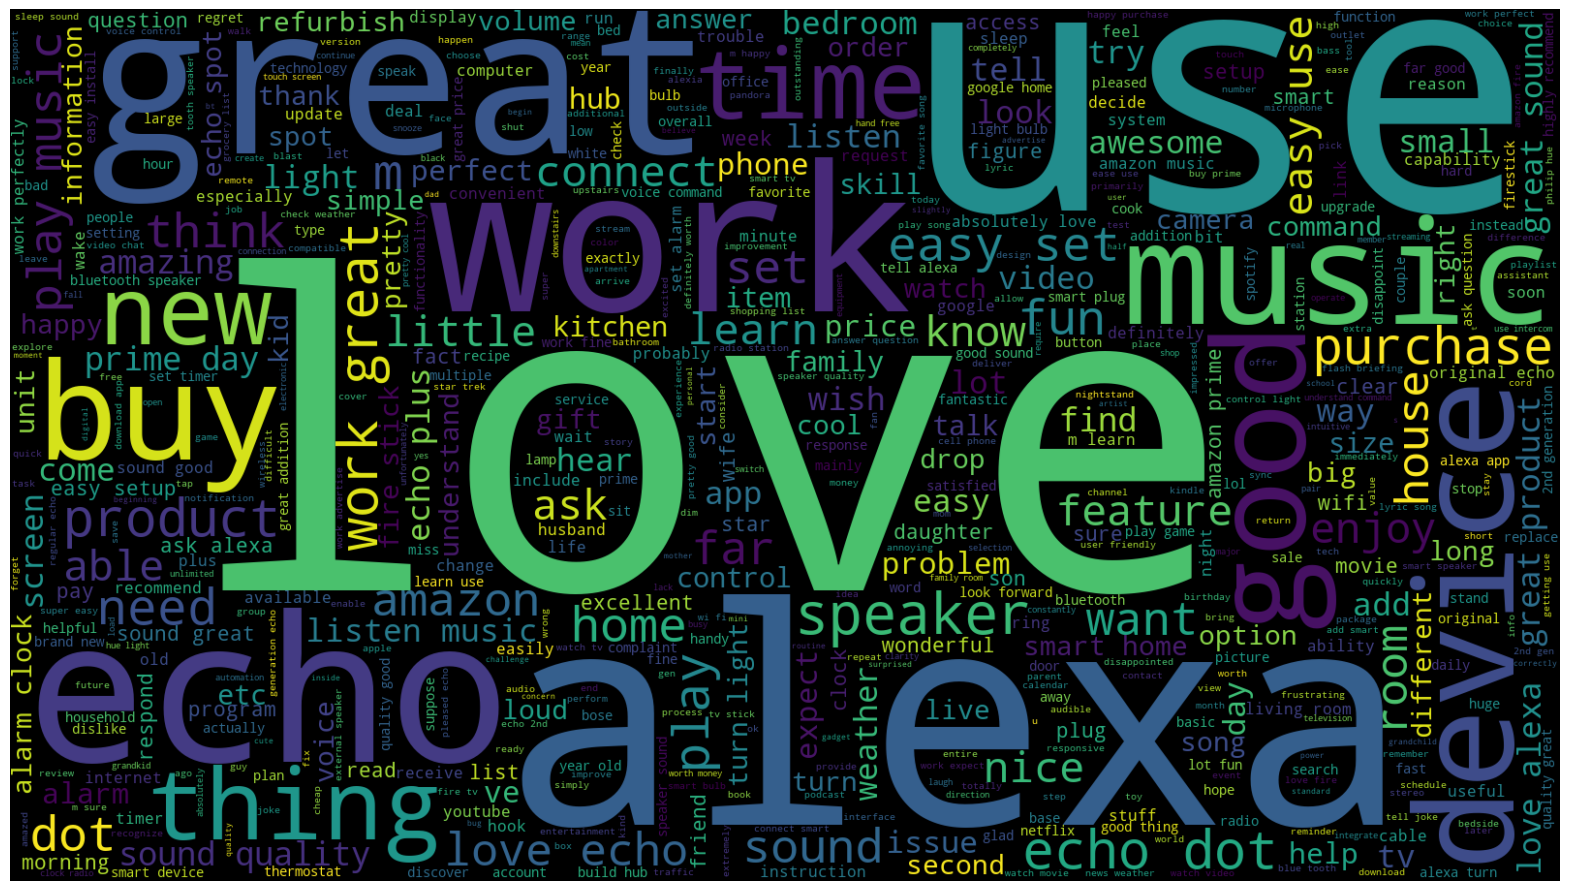

In [35]:
text=" ".join([w for w in df_pos['verified_reviews']])
plt.figure(figsize=(20,25))
wordc=WordCloud(max_words=600,width=1600,height=900).generate(text)
plt.imshow(wordc,interpolation='bilinear')
plt.axis('off')


# 2.Wordcloud for Negative reviews

In [36]:
df_neg=df[df['feedback']==0]

In [37]:
df_neg.head()

,verified_reviews,feedback
46,like siri fact siri answer accurately alexa ...,0
111,sound terrible u want good music bose,0
141,feature,0
162,stop work 2 week follow command fun work,0
176,sad joke worthless,0


(-0.5, 1599.5, 899.5, -0.5)

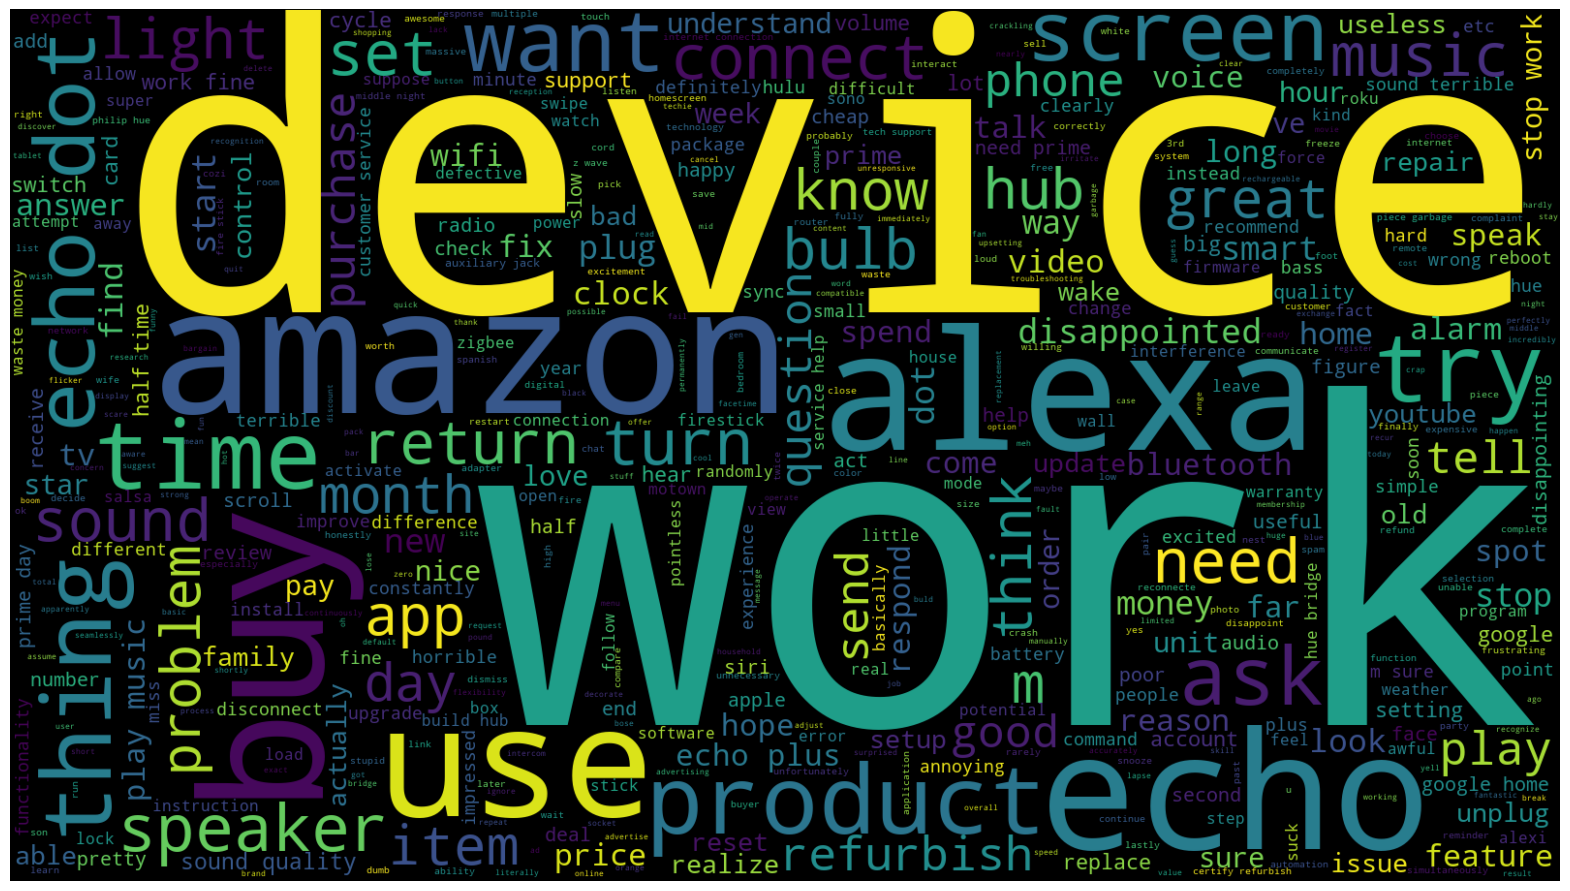

In [38]:
t=" ".join([w for w in df_neg['verified_reviews']])
plt.figure(figsize=(20,25))
wor=WordCloud(max_words=500,width=1600,height=900).generate(t)
plt.imshow(wor,interpolation='bilinear')
plt.axis('off')

# Spliting into independent and target column

In [39]:
X=df['verified_reviews']

In [40]:
y=df['feedback']

# Vectoraization

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tf=TfidfVectorizer()

In [43]:
X=tf.fit_transform(X)

# Spliting into training and testing data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# -----TRAINING THE MODELS-----

# 1.Logisitc regression model

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log=LogisticRegression()

In [48]:
log.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred1=log.predict(x_test)

# -------------------------------------------

# 2.KNN model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
kn=KNeighborsClassifier()

In [52]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred2=kn.predict(x_test)

# ------------------------------------------

# 3.Multinomial Naive_Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
mul=MultinomialNB()

In [56]:
mul.fit(x_train,y_train)

MultinomialNB()

In [57]:
y_pred3=mul.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
model=pd.DataFrame({"Logistic":accuracy_score(y_test,y_pred1),
                   "KNN":accuracy_score(y_test,y_pred2),
                   "Multinomial":accuracy_score(y_test,y_pred3),
                   },index=[0])

In [60]:
model

,Logistic,KNN,Multinomial
0,0.926984,0.902646,0.92381


# ------CONFUSION MATRIX------

# 1.LogisticRegression model

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
xtrain1=log.predict(x_train)

In [63]:
c1=confusion_matrix(y_train,xtrain1)
print("TRAIN DATA")
print()
print(c1)

TRAIN DATA

[[  11  176]
 [   0 2018]]


In [64]:
cf1=confusion_matrix(y_test,y_pred1)
print("TEST DATA")
print()
print(cf1)

TEST DATA

[[  1  69]
 [  0 875]]


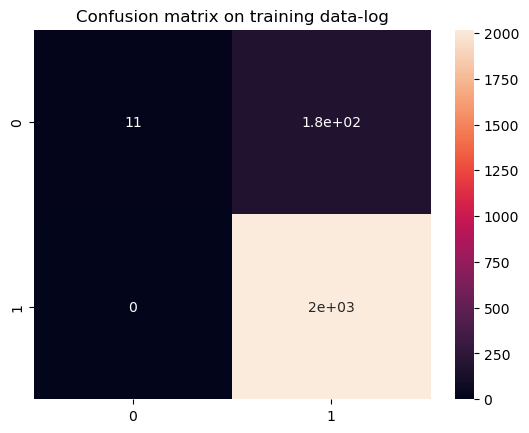

In [65]:
plt.title("Confusion matrix on training data-log")
sns.heatmap(c1,annot=True)
plt.show()

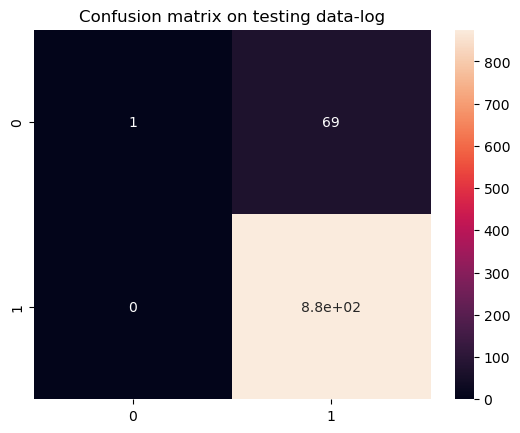

In [66]:
plt.title("Confusion matrix on testing data-log")
sns.heatmap(cf1,annot=True)
plt.show()

In [67]:
print("Accuracy_Score for Training data:",round(accuracy_score(y_train,xtrain1)*100,2))
print("Accuracy_Score for Testing data:",round(accuracy_score(y_test,y_pred1)*100,2))

Accuracy_Score for Training data: 92.02
Accuracy_Score for Testing data: 92.7


# -------------------------------------------------------

# 2.KNN Model

In [68]:
xtrain2=kn.predict(x_train)

In [69]:
c2=confusion_matrix(y_train,xtrain2)
print("TRAIN DATA")
print()
print(c2)

TRAIN DATA

[[  52  135]
 [  36 1982]]


In [70]:
cf2=confusion_matrix(y_test,y_pred2)
print("TEST DATA")
print()
print(cf2)

TEST DATA

[[ 11  59]
 [ 33 842]]


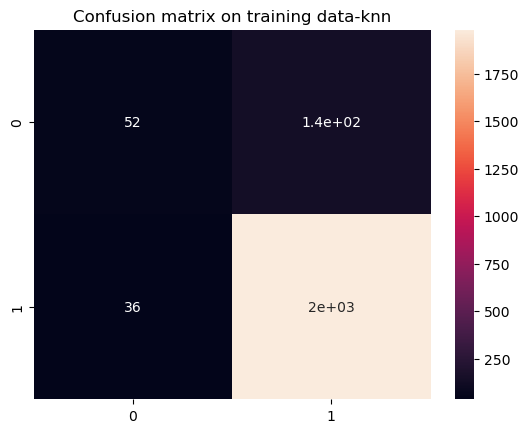

In [71]:
plt.title("Confusion matrix on training data-knn")
sns.heatmap(c2,annot=True)
plt.show()

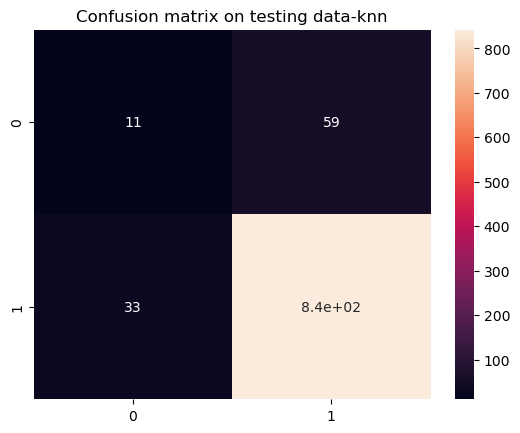

In [72]:
plt.title("Confusion matrix on testing data-knn")
sns.heatmap(cf2,annot=True)
plt.show()

In [73]:
print("Accuracy_Score for Training data:",round(accuracy_score(y_train,xtrain2)*100,2))
print("Accuracy_Score for Testing data:",round(accuracy_score(y_test,y_pred2)*100,2))

Accuracy_Score for Training data: 92.24
Accuracy_Score for Testing data: 90.26


# -----------------------------------------------------------

# 3.Multinomial naive_bayes

In [74]:
xtrain3=mul.predict(x_train)

In [75]:
c3=confusion_matrix(y_train,xtrain3)
print("TRAIN DATA")
print()
print(c3)

TRAIN DATA

[[   3  184]
 [   0 2018]]


In [76]:
cf3=confusion_matrix(y_test,y_pred3)
print("TEST DATA")
print()
print(cf3)

TEST DATA

[[  0  70]
 [  2 873]]


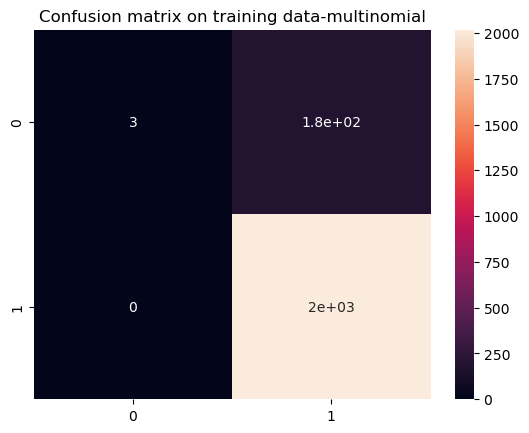

In [77]:
plt.title("Confusion matrix on training data-multinomial")
sns.heatmap(c3,annot=True)
plt.show()

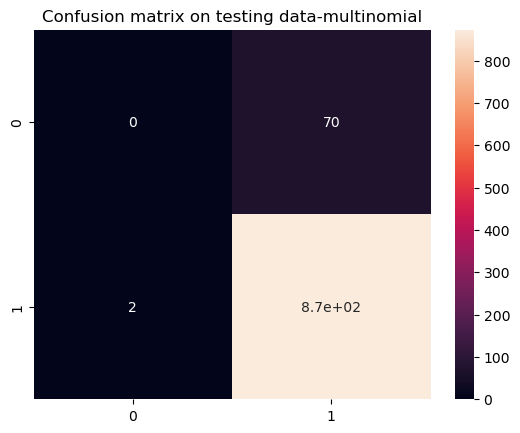

In [78]:
plt.title("Confusion matrix on testing data-multinomial")
sns.heatmap(cf3,annot=True)
plt.show()

In [79]:
print("Accuracy_Score for Training data:",round(accuracy_score(y_train,xtrain3)*100,2))
print("Accuracy_Score for Testing data:",round(accuracy_score(y_test,y_pred3)*100,2))

Accuracy_Score for Training data: 91.66
Accuracy_Score for Testing data: 92.38


# ---------CLASSIFICATION REPORT---------

# 1.Classification report-LogisticRegression

In [80]:
from sklearn.metrics import classification_report

In [81]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        70
           1       0.93      1.00      0.96       875

    accuracy                           0.93       945
   macro avg       0.96      0.51      0.50       945
weighted avg       0.93      0.93      0.89       945



# -----------------------------------------------

# 2.Classification report -KNN

In [82]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.25      0.16      0.19        70
           1       0.93      0.96      0.95       875

    accuracy                           0.90       945
   macro avg       0.59      0.56      0.57       945
weighted avg       0.88      0.90      0.89       945



# ---------------------------------------------------------

# 3.Classification report-MultinomialNB

In [83]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.93      1.00      0.96       875

    accuracy                           0.92       945
   macro avg       0.46      0.50      0.48       945
weighted avg       0.86      0.92      0.89       945



# --------RESULT PHASE--------

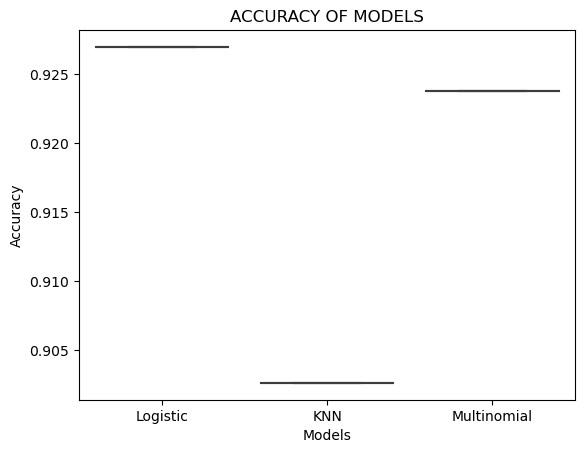

In [84]:
plt.title("ACCURACY OF MODELS")
sns.boxplot(data=model)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# RESULT:LOGISITC REGRESSION MODEL PERFORMING WITH ACCURACY OF ABOUT:
       

# 92% ON TRAINING DATA
        


# 93% ON TESTING DATA

# -----------------------------------------------------------

# TRAINING THE LOGISTIC MODEL ON WHOLE DATA SET

In [85]:
ll=LogisticRegression()

In [86]:
ll.fit(X,y)

LogisticRegression()

# ------------SAVING THE MODEL-------------

In [87]:
import pickle as pk

# 1.Saving logisitic regression model

In [88]:
file1=open("log_alex.pkl",'wb')

In [89]:
pk.dump(ll,file1)

In [90]:
model1=pk.load(open("log_alex.pkl","rb"))

# REPORT: LOGISTIC REGRESSION MODEL WITH THE PERFORMANCE AROUND:

 # 92% ON TRAINING DATA
 
  # 93% ON TESTING DATA